# Exploratory Data Analysis

In [ ]:
# TODO: add soil type or climate type etc. to soil type bar plot
# TODO: compare test and train distributions

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data path
data_path = "../data"

## Training Data

In [3]:
df_train = pd.read_csv(os.path.join(data_path, "train.csv"))

In [4]:
df_train.describe()

Id     Elevation        Aspect         Slope  \
count   15120.000000  15120.000000  15120.000000  15120.000000   
mean   267008.526389   2748.649934    155.834524     16.556746   
std    179261.722330    419.009589    109.745372      8.534602   
min         5.000000   1877.000000      0.000000      0.000000   
25%    103705.000000   2373.000000     65.000000     10.000000   
50%    276034.500000   2754.000000    125.000000     15.000000   
75%    398150.250000   3109.000000    257.000000     22.000000   
max    581005.000000   3850.000000    360.000000     50.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         228.376521                       51.311706   
std                          209.196381                       61.520488   
min                            0.000000                     -135.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       80.000000   
max                         1376.000000                      570.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1717.977712     213.028836      218.865741   
std                        1330.263450      30.638406       22.797288   
min                           0.000000      52.000000       99.000000   
25%                         760.000000     197.000000      207.000000   
50%                        1315.000000     220.000000      223.000000   
75%                        2292.000000     236.000000      235.000000   
max                        6803.000000     254.000000      254.000000   

       Hillshade_3pm  ...   Soil_Type32   Soil_Type33   Soil_Type34  \
count   15120.000000  ...  15120.000000  15120.000000  15120.000000   
mean      134.477116  ...      0.043849      0.040939      0.001190   
std        46.070054  ...      0.204766      0.198156      0.034484   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%       106.000000  ...      0.000000      0.000000      0.000000   
50%       138.000000  ...      0.000000      0.000000      0.000000   
75%       166.000000  ...      0.000000      0.000000      0.000000   
max       251.000000  ...      1.000000      1.000000      1.000000   

        Soil_Type35   Soil_Type36   Soil_Type37   Soil_Type38   Soil_Type39  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.006812      0.000926      0.002116      0.049206      0.041931   
std        0.082257      0.030416      0.045957      0.216306      0.200439   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type40    Cover_Type  
count  15120.000000  15120.000000  
mean       0.030159      4.000000  
std        0.171030      2.000066  
min        0.000000      1.000000  
25%        0.000000      2.000000  
50%        0.000000      4.000000  
75%        0.000000      6.000000  
max        1.000000      7.000000  

[8 rows x 56 columns]

In [5]:
# check if cover type is unbalanced in the training set or not
df_train.Cover_Type.value_counts()

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64

### Numerical train data: Correlations

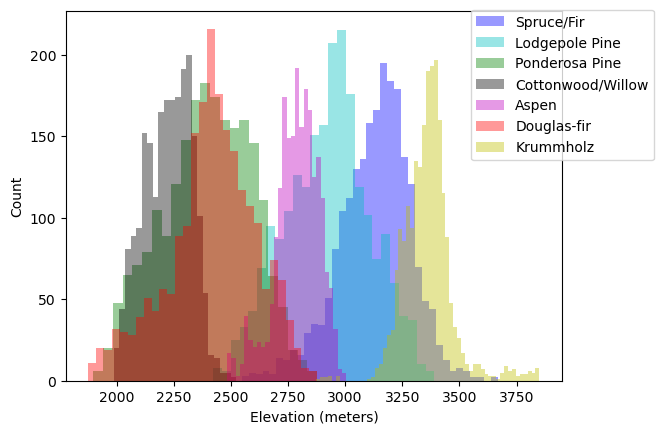

In [6]:
# Plot an Elevation's histogram for each Cover Type to check for class separation
elevations = df_train.loc[:, ['Elevation', 'Cover_Type']]

# Dictionary for mapping each integer target label to its string value
covtype_label_name_dict = {1: 'Spruce/Fir',
                           2: 'Lodgepole Pine',
                           3: 'Ponderosa Pine',
                           4: 'Cottonwood/Willow',
                           5: 'Aspen',
                           6: 'Douglas-fir',
                           7: 'Krummholz'}

custom_palette = ['b', 'c', 'g', 'k', 'm', 'r', 'y']


# Iterate through the dictionary to plot a histogram for each cover type
for covtype_id, covtype_name in covtype_label_name_dict.items():
    palette_idx = covtype_id - 1        
    by_one_covtype = elevations.groupby('Cover_Type') \
                                    .apply(lambda x: x[ x['Cover_Type'] == covtype_id ])
    ax = sns.histplot(by_one_covtype.Elevation,
                        color=custom_palette[palette_idx], label=covtype_name, kde=False,
                        alpha=0.4, linewidth=0)

plt.legend(loc='right', bbox_to_anchor=(1.2, 0.8))
ax.set(xlabel='Elevation (meters)', ylabel='Count')
plt.show()

# 4 (Willow), 5 (Aspen) and 7 (Krummholz) are easily separable

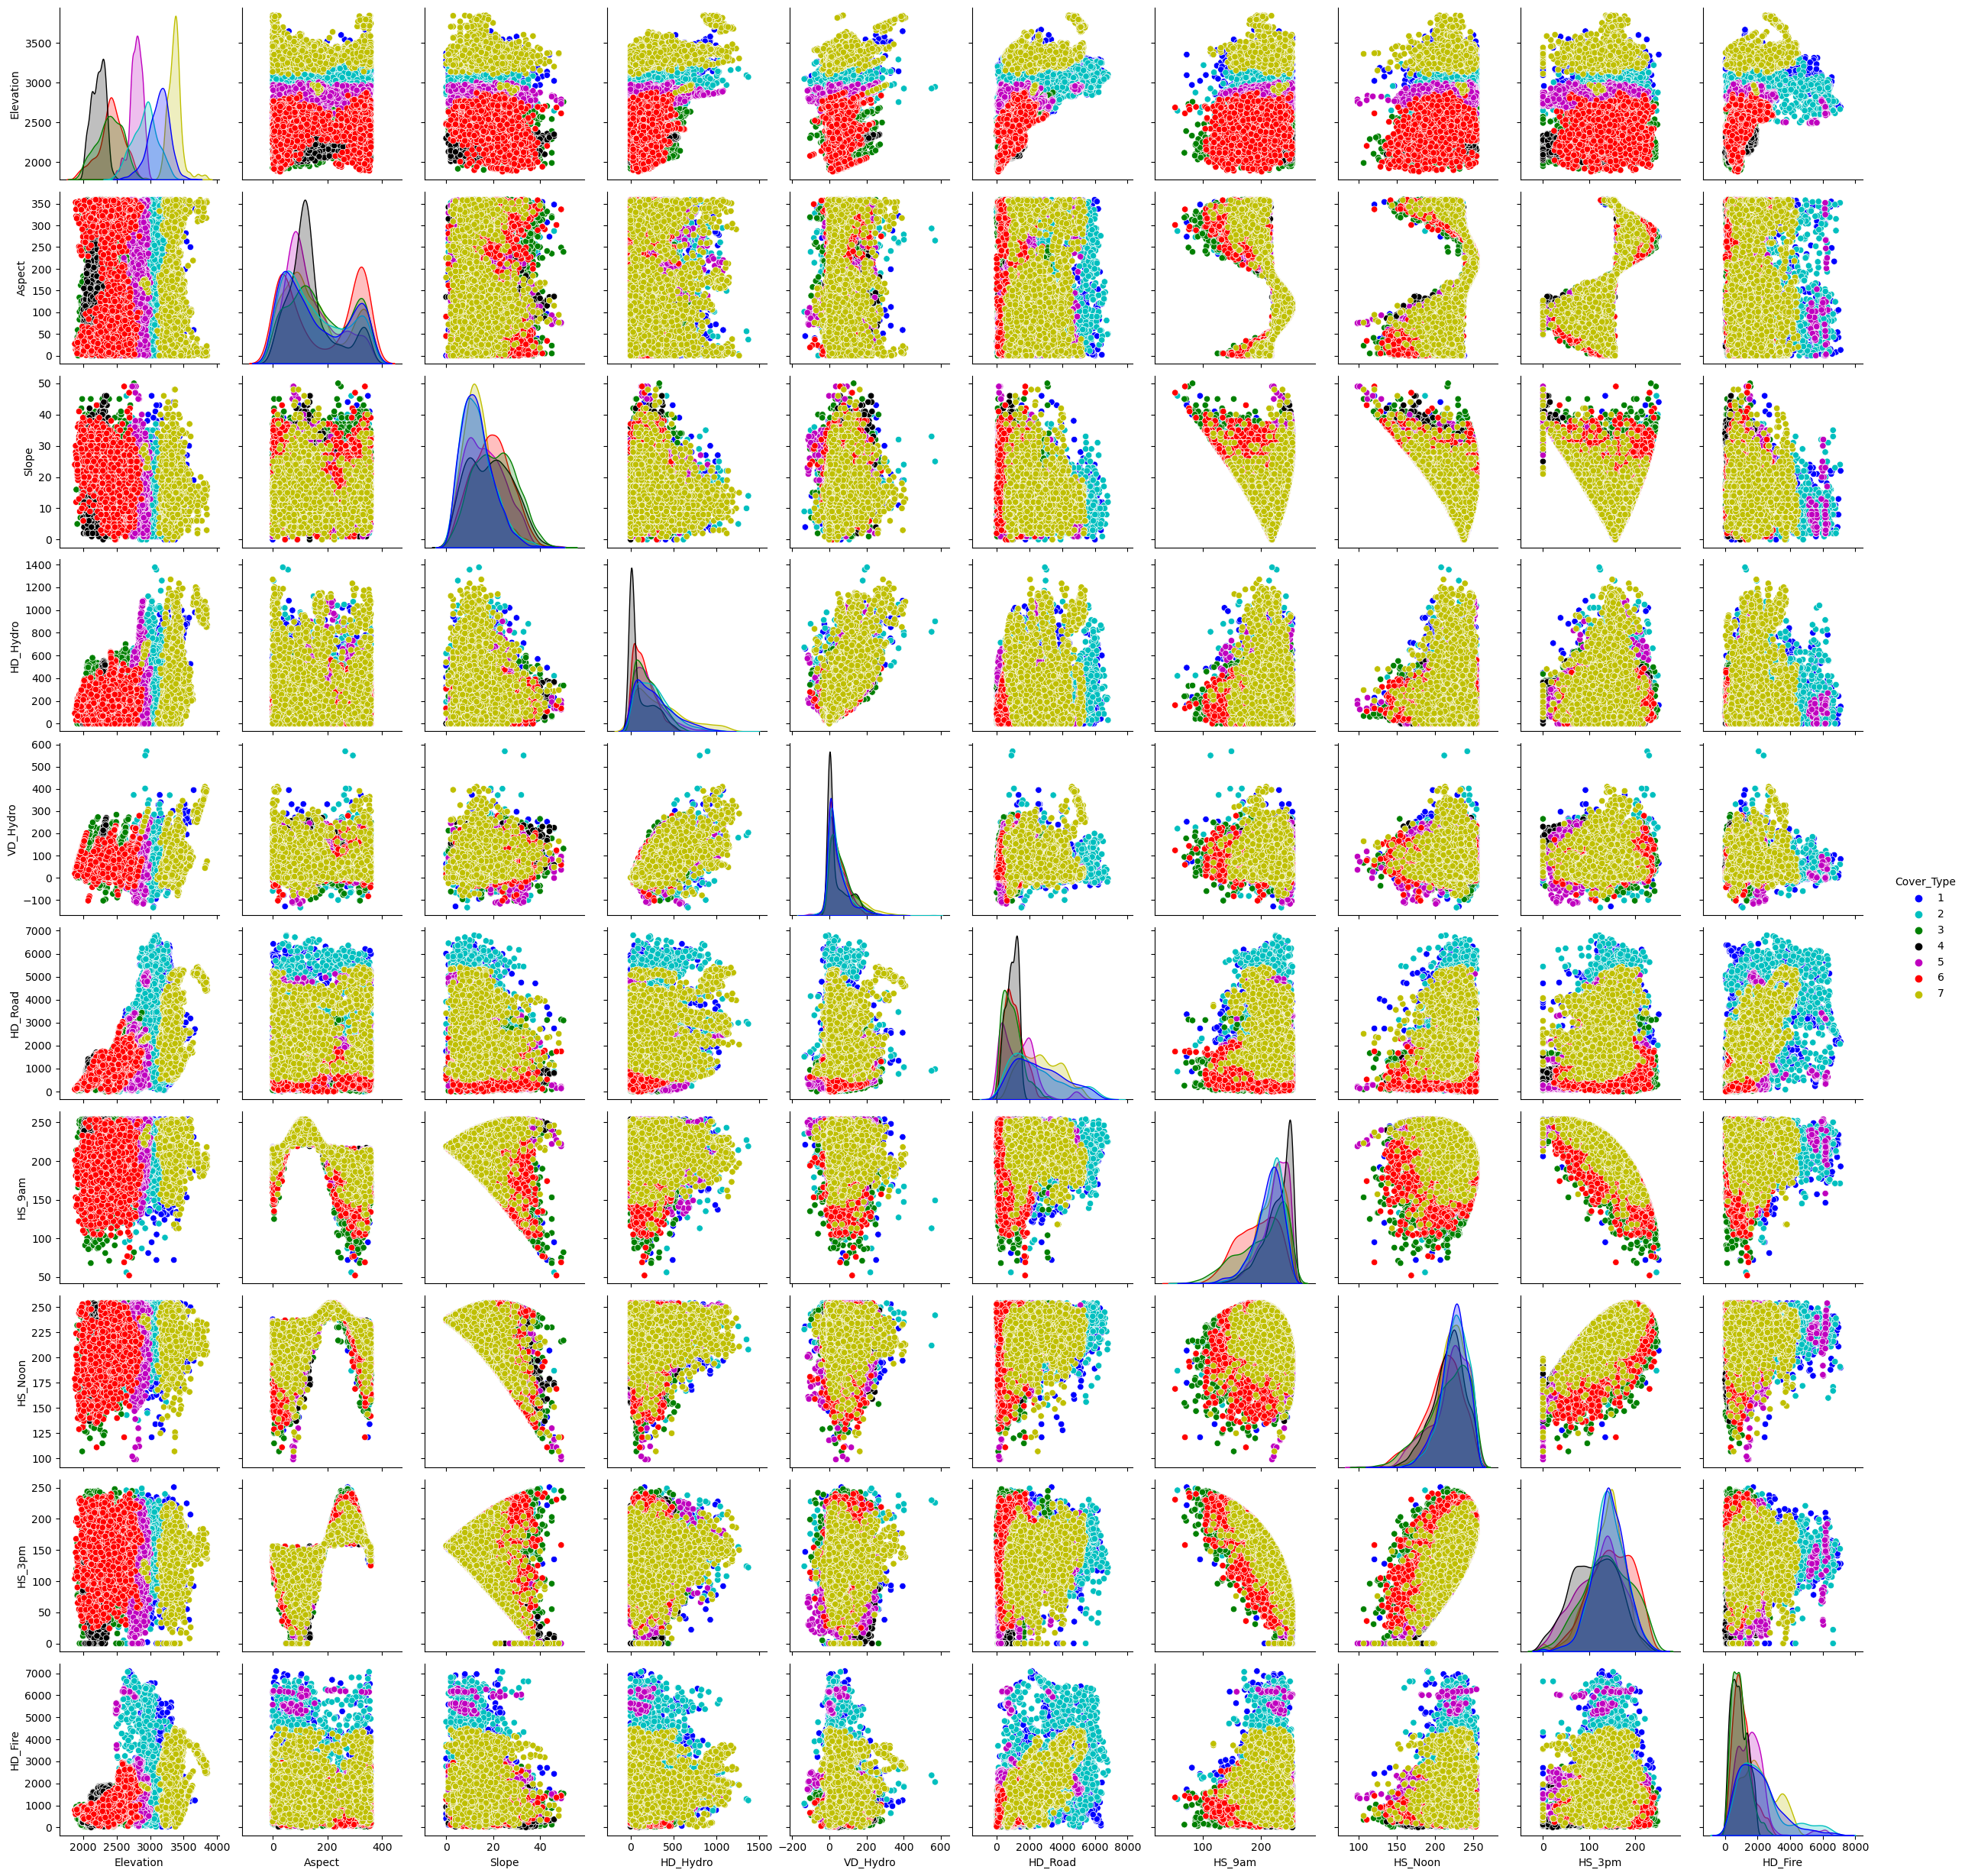

In [7]:
features = ['Elevation', 'Aspect',
            'Slope',
            'Horizontal_Distance_To_Hydrology',
            'Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways',
            'Hillshade_9am', 'Hillshade_Noon',
            'Hillshade_3pm',
            'Horizontal_Distance_To_Fire_Points', 'Cover_Type']
labels = ['Elevation', 'Aspect',
            'Slope', 'HD_Hydro',
            'VD_Hydro', 'HD_Road',
            'HS_9am', 'HS_Noon',
            'HS_3pm', 'HD_Fire','Cover_Type']
            
shorter_labels = dict(zip(features, labels))

corr_train = df_train[features].copy()
corr_train.rename(columns=shorter_labels, inplace=True)
axes= sns.pairplot(corr_train, hue='Cover_Type', palette=custom_palette)


Let's study the most correlated couples

In [8]:
#Highly Correlated Values 
df_corr = corr_train.corr()
threshold = 0.5
 
corr_list = []
for i in range(0, 10):
    for j in range(i+1, 10): 
        if (df_corr.iloc[i, j] >= threshold and df_corr.iloc[i,j] < 1) or (
            df_corr.iloc[i,j] < 0 and df_corr.iloc[i,j] <= -threshold):
            corr_list.append([df_corr.iloc[i, j], i, j]) 
          
corr_list = sorted(corr_list, key=lambda x: -abs(x[0]))

for k,i,j in corr_list:
    print ("%s and %s = %.2f" % (labels[i], labels[j], k))

HS_9am and HS_3pm = -0.78
HD_Hydro and VD_Hydro = 0.65
Aspect and HS_3pm = 0.62
Slope and HS_Noon = -0.61
HS_Noon and HS_3pm = 0.61
Aspect and HS_9am = -0.59
Elevation and HD_Road = 0.58


## Categorical data

In [9]:
X_cat_columns = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']
X_cat = df_train[X_cat_columns]
X_cat.head()

Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  \
0                 1                 0                 0                 0   
1                 0                 0                 1                 0   
2                 1                 0                 0                 0   
3                 0                 1                 0                 0   
4                 1                 0                 0                 0   

   Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   ...  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  \
0  ...            0            0            0            0            0   
1  ...            0            0            0            0            0   
2  ...            0            0            0            0            0   
3  ...            0            0            0            0            0   
4  ...            0            0            0            0            0   

   Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  
0            0            0            0            0            0  
1            0            0            0            0            0  
2            0            0            0            0            0  
3            0            0            0            0            0  
4            0            0            0            0            0  

[5 rows x 44 columns]

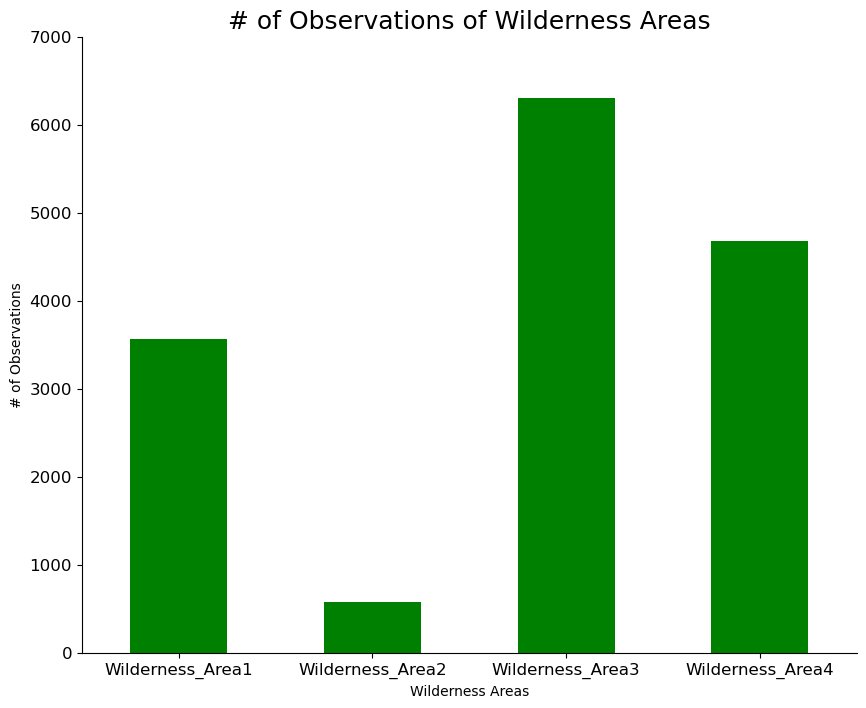

In [10]:
# split cat_features
wild_data, soil_data = X_cat.iloc[:,:4], X_cat.iloc[:,4:]

# sum the data, plot bar
wild_data.sum().plot(kind='bar', figsize=(10,8), color='g')
plt.title('# of Observations of Wilderness Areas', size=18)
plt.xlabel('Wilderness Areas')
plt.ylabel('# of Observations')
plt.ylim([0,7000])
plt.xticks(rotation='horizontal', size=12)
plt.yticks(size=12)

sns.despine()
plt.show()

In [11]:
wild_data.sum()

Wilderness_Area1    3568
Wilderness_Area2     569
Wilderness_Area3    6302
Wilderness_Area4    4681
dtype: int64

- Wilderness_Area3 and Wilderness_Area4 have the most presence.
- Wilderness_Area2 has the least amount of observations

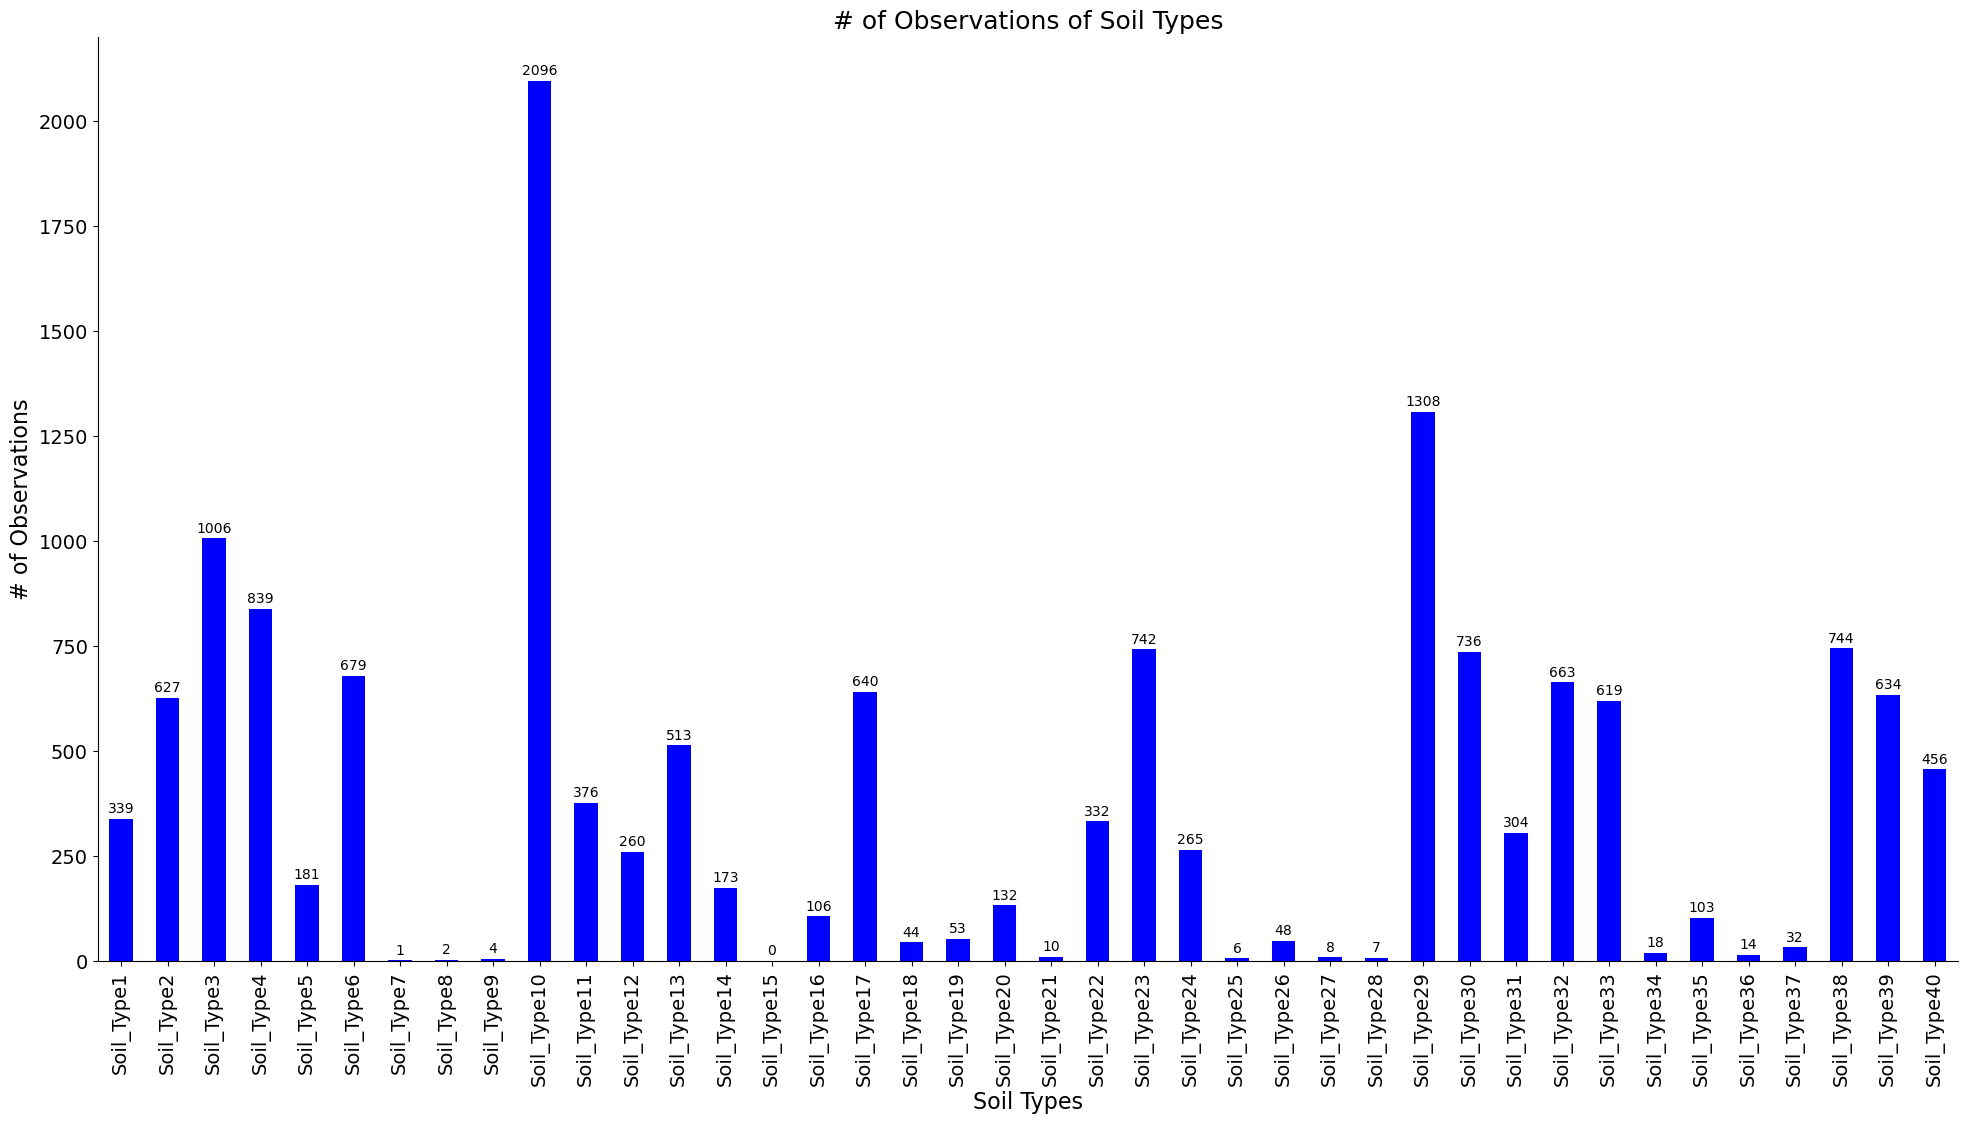

In [12]:
soil_data.sum().plot(kind='bar', figsize=(24,12), color='b')
plt.title('# of Observations of Soil Types', size=18)
plt.xlabel('Soil Types', size=16)
plt.ylabel('# of Observations', size=16)
plt.xticks(rotation=90, size=14)
plt.yticks(size=14)
xlocs, _ = plt.xticks()
for i, v in enumerate(soil_data.sum()):
    plt.text(xlocs[i], v+15, str(v), horizontalalignment='center')

sns.despine()
plt.show()

- The most observation is seen from Soil_Type10 followed by Soil_Type29.

## Test Data

In [13]:
df_test = pd.read_csv(os.path.join(data_path, "test-full.csv"))
df_test.describe()

Id      Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean   290506.500000    2959.365301     155.656807      14.103704   
std    167723.861638     279.984734     111.913721       7.488242   
min         1.000000    1859.000000       0.000000       0.000000   
25%    145253.750000    2809.000000      58.000000       9.000000   
50%    290506.500000    2996.000000     127.000000      13.000000   
75%    435759.250000    3163.000000     260.000000      18.000000   
max    581012.000000    3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  ...    Soil_Type31    Soil_Type32    Soil_Type33  \
count  581012.000000  ...  581012.000000  581012.000000  581012.000000   
mean      142.528263  ...       0.044175       0.090392       0.077716   
std        38.274529  ...       0.205483       0.286743       0.267725   
min         0.000000  ...       0.000000       0.000000       0.000000   
25%       119.000000  ...       0.000000       0.000000       0.000000   
50%       143.000000  ...       0.000000       0.000000       0.000000   
75%       168.000000  ...       0.000000       0.000000       0.000000   
max       254.000000  ...       1.000000       1.000000       1.000000   

         Soil_Type34    Soil_Type35    Soil_Type36    Soil_Type37  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.002773       0.003255       0.000205       0.000513   
std         0.052584       0.056957       0.014310       0.022641   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         Soil_Type38    Soil_Type39    Soil_Type40  
count  581012.000000  581012.000000  581012.000000  
mean        0.026803       0.023762       0.015060  
std         0.161508       0.152307       0.121791  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000  

[8 rows x 55 columns]

## Train/Test size difference

In [14]:
print("Size of train data: ", df_train.shape)
print("Size of test data: ", df_test.shape)

Size of train data:  (15120, 56)
Size of test data:  (581012, 55)


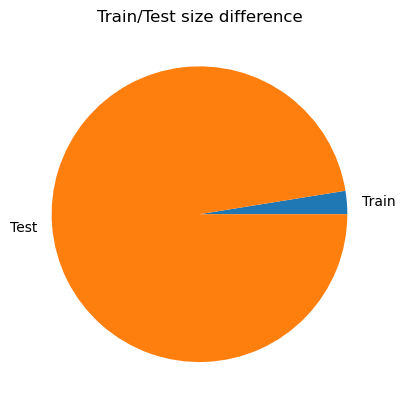

In [15]:
temp = pd.DataFrame({"Dataset": ["Train", "Test"], "Number of Records": [df_train.shape[0], df_test.shape[0]]})
plt.pie(temp["Number of Records"], labels=temp["Dataset"])
plt.title("Train/Test size difference");

## Analysis of examplery submission

In [16]:
output = pd.read_csv(os.path.join(data_path, "full_submission.csv"))

In [17]:
print("Size of the submission: ", output.shape)
# check the unique ids of the entries
print("Unique Ids in submission: ", output.Id.nunique())

Size of the submission:  (581012, 2)
Unique Ids in submission:  581012


In [18]:
# investigate the distribution of the target in the sample submission
output.Cover_Type.describe()

count    581012.000000
mean          3.997394
std           1.998180
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max           7.000000
Name: Cover_Type, dtype: float64

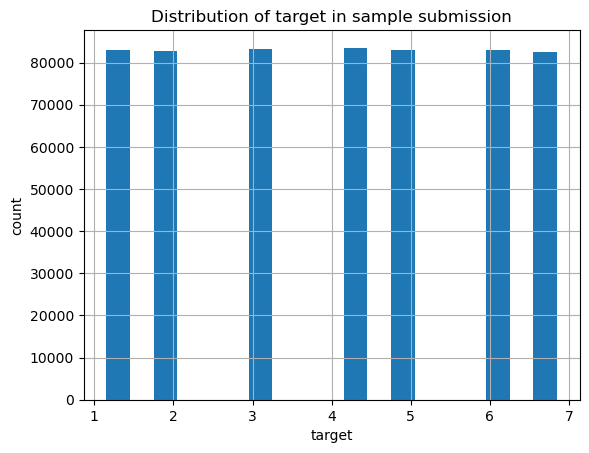

In [19]:
output.Cover_Type.hist(rwidth=0.5)
plt.title("Distribution of target in sample submission")
plt.xlabel("target")
plt.ylabel("count");